# Predict companies' performance - Part 2/2

## Step 1 - Import librairies

In [21]:
# Data manipulation
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice manipulation
import numpy as np

# Since the Scikit library is big, we only import what we need

# train_test_split : method to split the dataset (DataFrame) into two distinct : one for training, one for testing
from sklearn.model_selection import train_test_split

# SimpleImputer : class which allow us to fill missing values (null, NaN) with specific strategy (median, mean, mode, etc.)
from sklearn.impute import SimpleImputer

# StandardScaler : class which allow us to standardize (put on the same scale) numerical features (using z-score)
# OneHotEncoder : class which allow us to encode categorical features (create a column per category that contain only 0 and 1)
# LabelEncoder : class which allow us to encode labels (same as categorical, but with a "binary" template of data) 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# ColumnTransformer : : class which allow us to use scalers and encoders ojects to transform our DataFrames, returning numpy arrays
from sklearn.compose import ColumnTransformer

# LinearRegression : class which allow us to perform a linear regression model on our data
from sklearn.linear_model import LinearRegression

## Step 2 - Import dataset 

In [22]:
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Rows , Columuns : (50, 5)

            R&D Spend  Administration  Marketing Spend     State  \
count       50.000000       50.000000        50.000000        50   
unique            NaN             NaN              NaN         3   
top               NaN             NaN              NaN  New York   
freq              NaN             NaN              NaN        17   
mean     73721.615600   121344.639600    211025.097800       NaN   
std      45902.256482    28017.802755    122290.310726       NaN   
min          0.000000    51283.140000         0.000000       NaN   
25%      39936.370000   103730.875000    129300.132500       NaN   
50%      73051.080000   122699.795000    212716.240000       NaN   
75%     101602.800000   144842.180000    299469.085000       NaN   
max     165349.200000   182645.560000    471784.100000       NaN   

               Profit  
count       50.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    112012.639200  
std      403

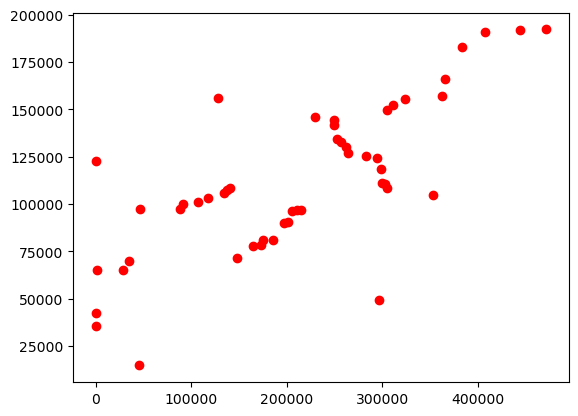

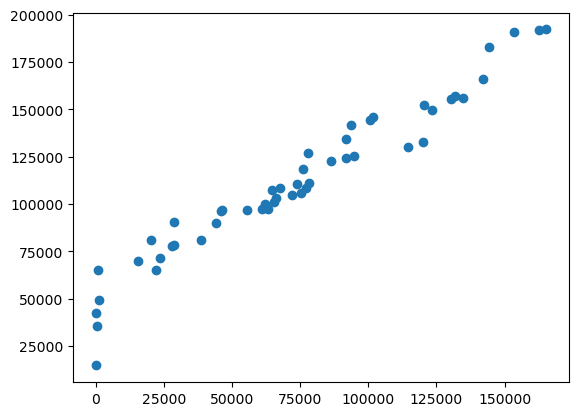

In [ ]:
# Print the shape of dataset in the form of (#rows, #columns)
print(f"Rows , Columuns : {df.shape}")
print()

# Describe dataset's main statistics
# We're using the include="all" attribut because we want to see/explore all values (not only numbers)
# We need to see if there's missing values (null / NaN) and the type of data we have (numerical, categorical, labels, etc.)
print(df.describe(include="all"))
print()

# We're looking for missing values (display True or False for each column depending if values are missing or not)
print(df.isnull().any())

# We show the relationship between Marketing Spend and Profit
plt.scatter(df.iloc[:, 2], df.iloc[:,4], color="red")
plt.show()

# We show the relationship between R&D Spend and Profit
plt.scatter(df.iloc[:, 0], df.iloc[:, 4])
plt.show()

## Step 3 - Separate Target from feature variables

In [24]:
print("Separating labels from features...")

# We create two separate DataFrames, one with our features X and one for the target variable Y (that we want to predict)
# We're using a List to enumerate the columns that we're going to use as features X
features_list = ["R&D Spend", "Administration" , "Marketing Spend", "State"]

X = df[features_list] # We add feature_list into our loc 
y = df["Profit"] # We set "Profit" as the target variable

print("...Done.")
print()

print(X.head())
print()
print(y.head())

Separating labels from features...
...Done.

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


## Step 4 - Train / Test split 

In [25]:
print("Splitting dataset into train set and test set...")

# The method will return 4 arrays : 2 with features X and 2 with target variables y (each time : 1 for training the model, 1 for testing it)
# X : our DataFrames of features
# y : our DataFrames of target variables
# test_size : the size of the training set compared with total set, using proportion => 0.20 (20%)
# random_state : the method we use to randomly selected our data
# stratify : allows to stratify your sample (same proportion of categories in test and train set) on a specific column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("...Done.")  
print()
print(X_train.head())
print()                    
print(y_train.head())                    
print()                    

print(X_test.head())
print()                    
print(y_test.head())

Splitting dataset into train set and test set...
...Done.

    R&D Spend  Administration  Marketing Spend       State
33   55493.95       103057.49        214634.81     Florida
35   46014.02        85047.44        205517.64    New York
26   75328.87       144135.98        134050.07     Florida
34   46426.07       157693.92        210797.67  California
18   91749.16       114175.79        294919.57     Florida

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64

    R&D Spend  Administration  Marketing Spend       State
28   66051.52       182645.56        118148.20     Florida
11  100671.96        91790.61        249744.55  California
10  101913.08       110594.11        229160.95     Florida
41   27892.92        84710.77        164470.71     Florida
2   153441.51       101145.55        407934.54     Florida

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64


## Step 5 - Training

In [26]:
print("--- Training pipeline ---")

--- Training pipeline ---


### Imputing missing values

In [27]:
# No missing values

### Standardizing (scaling) and encoding

In [28]:
print("Encoding categorical features and standardizing numerical features...")
print()

# We create a list with ids of columns containing numerical features in order to standardize them 
numeric_features = [0, 1, 2]
numeric_transformer = StandardScaler()

# We create a list with ids of columns containing categorical features in order to encode them 
categorical_features = [3]
categorical_transformer = OneHotEncoder()

# Instansiate the class ColumnTransformer with our transformers (in this case : one for scaling, one for encoding)
feature_encoder = ColumnTransformer(
    transformers=[   
        ('cat', categorical_transformer, categorical_features), 
        ('num', numeric_transformer, numeric_features)
    ]
)

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print()
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

...Done.

[[ 0.          1.          0.         -0.35006454 -0.78547109  0.1011968 ]
 [ 0.          0.          1.         -0.55530319 -1.48117426  0.02734979]
 [ 0.          1.          0.          0.07935762  0.80133381 -0.55152132]
 [ 1.          0.          0.         -0.54638238  1.32505817  0.07011684]
 [ 0.          1.          0.          0.43485371 -0.35598663  0.75148516]]



### Build and train the model

In [29]:
# Train model
print("Train model...")

regressor = LinearRegression()

# This steps is the actual training !
regressor.fit(X_train, y_train)

print("...Done.")

Train model...
...Done.


### Predict

In [30]:
# Predictions on training set
print("Predictions on training set...")

y_train_pred = regressor.predict(X_train)

print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646]



## Step 6 - Testing

In [31]:
print("--- Test pipeline ---")

--- Test pipeline ---


### Imputing missing values

In [32]:
# No missing values

### Standardizing (scaling) and encoding

In [33]:
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test)
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")
print()
print(X_test)

Encoding categorical features and standardizing numerical features...

    R&D Spend  Administration  Marketing Spend       State
28   66051.52       182645.56        118148.20     Florida
11  100671.96        91790.61        249744.55  California
10  101913.08       110594.11        229160.95     Florida
41   27892.92        84710.77        164470.71     Florida
2   153441.51       101145.55        407934.54     Florida
27   72107.60       127864.55        353183.81    New York
38   20229.59        65947.93        185265.10    New York
31   61136.38       152701.92         88218.23    New York
22   73994.56       122782.75        303319.26     Florida
4   142107.34        91391.77        366168.42     Florida

...Done.

[[ 0.          1.          0.         -0.1214952   2.2889053  -0.68032287]
 [ 1.          0.          0.          0.6280306  -1.22069499  0.38557774]
 [ 0.          1.          0.          0.65490061 -0.49434195  0.21885524]
 [ 0.          1.          0.         -0.947

### Predict

In [34]:
# Predictions on test set
print("Predictions on test set...")

y_test_pred = regressor.predict(X_test)

print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055]



## Step 7 - Evaluate your model

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

# R2 close to 1 => good performance
# R2 train +/- 5% R2 test => good performance
# If more :
# R2 train > R2 test => overfitting, impossible to generalize, need more data
# R2 train < R2 test => underfitting, not really a problem, maybe use a complex model
if(regressor.score(X_train, y_train) > regressor.score(X_test, y_test)) :
    print("R2 train > R2 test => overfitting")
else :
    print("R2 train < R2 test => underfitting")

--- Assessing the performances of the model ---
R2 score on training set :  0.9501847627493607
R2 score on test set :  0.9347068473282426
R2 train > R2 test => overfitting


## Step 9 - Feature importance

In [36]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [   86.63836918  -872.64579088   786.0074217  35726.28774249
   851.30163448  4519.88277698]
Constant is:  109354.85075245326


In [37]:
X_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  1.        ,  0.        , -0.35006454, -0.78547109,
         0.1011968 ],
       [ 0.        ,  0.        ,  1.        , -0.55530319, -1.48117426,
         0.02734979],
       [ 0.        ,  1.        ,  0.        ,  0.07935762,  0.80133381,
        -0.55152132],
       [ 1.        ,  0.        ,  0.        , -0.54638238,  1.32505817,
         0.07011684],
       [ 0.        ,  1.        ,  0.        ,  0.43485371, -0.35598663,
         0.75148516]])

In [38]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [3]), ('num', StandardScaler(), [0, 1, 2])]
One Hot Encoder transformer is:  OneHotEncoder()


In [39]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array(['California', 'Florida', 'New York'], dtype=object)]


In [40]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')


In [41]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend'], dtype=object)

In [42]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,California,86.638369
1,Florida,-872.645791
2,New York,786.007422
3,R&D Spend,35726.287742
4,Administration,851.301634
5,Marketing Spend,4519.882777


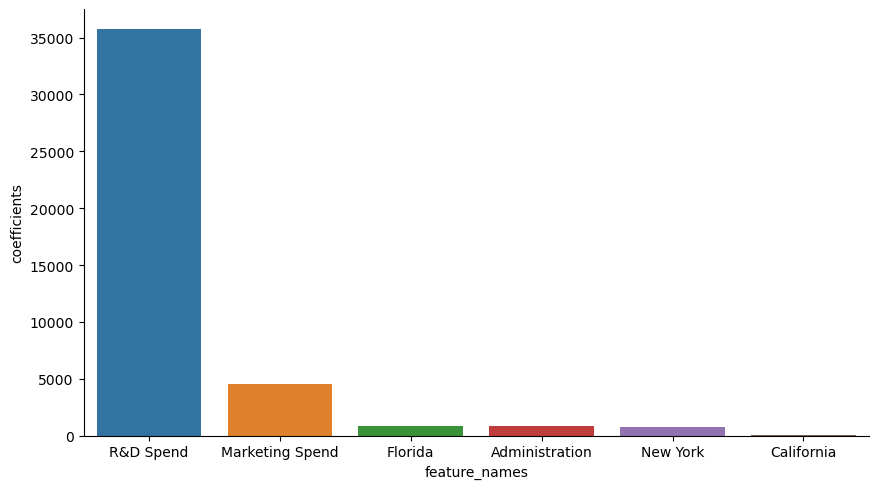

In [ ]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9, # Resize graph
            hue='feature_names')

# Se renseigner : https://shap.readthedocs.io/en/latest/index.html